In [5]:
import os
import pickle as pkl

import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
from copy import deepcopy
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'

from utils import count_scene_mentions

In [6]:
def count_scene_mention_number(scenes):
    count = 0
    for scene in scenes:
        count += len(scene['querySpans'])
    return count

In [7]:
def count_batch_mention_number(batches):
    count_list = []
    for batch in batches:
        count_temp = []
        for scene in batch:
            count_temp.append(len(scene['querySpans']))
        count_list.append(count_temp)
    return count_list

In [8]:
def get_batches_1(scenes):
    # Batch using threshold of 270 mentions
    batches = []
    temp = []
    num_mentions = 0
    for scene in scenes:
        length = len(scene['querySpans'])
        if length + num_mentions > 270:
            batches.append(temp)
            # Re-Initialize the temp and num_mentions
            temp = [scene]
            num_mentions = length
        else:
            temp.append(scene)
            num_mentions += length

    # Add the remaining batch
    batches.append(temp)
    return batches

In [9]:
def split_by_length_2(batches):
    # Split into regular and long
    small = []
    medium = []
    large = []
    for batch in batches:
        length = count_scene_mention_number(batch)
        if length <=150:
            small.append(batch)
        elif length<=300:
            medium.append(batch)
        else:
            large.append(batch)

    return small, medium, large

In [10]:
def add_small_to_medium_3(small, medium):
    # Merge small batches into medium
    sorted_small = sorted(small, key = lambda x: count_scene_mention_number(x), reverse=True)
    for batch in sorted_small:
        # Locate smallest batch in medium
        index = -1
        minimum = 10000
        for j in range(len(medium)):
            length = count_scene_mention_number(medium[j])
            if length < minimum:
                minimum = length
                index = j
        medium[index].extend(batch)

    return medium

In [25]:
def batch_pipeline(data):
    batches = get_batches_1(data)
    small, medium, large = split_by_length_2(batches)
    merged_medium = add_small_to_medium_3(small, medium)
    return merged_medium, large

In [63]:
input_root = "scenes/"
output_root = "batched_data/"

In [64]:
# Batch Dev
file_name = "dev_all"
with open(input_root+file_name+".pkl", 'rb') as f:
    data = pkl.load(f)
    medium, large = batch_pipeline(data)
    print("Medium:", len(medium), sum([len(item) for item in medium]), int(sum([sum(item) for item in count_batch_mention_number(medium)])/len(medium)))
    print("large:", len(large), sum([len(large) for item in large]), int(sum([sum(item) for item in count_batch_mention_number(large)])/len(large)))
    with open(output_root+file_name+"_medium.pkl", 'wb') as f:
        pkl.dump(medium, f)
    with open(output_root+file_name+"_large.pkl", 'wb') as f:
        pkl.dump(large, f)

Medium: 66 225 236
large: 2 4 517


In [81]:
print((66*236+2*517)/(66+2))

print((66*3.5+2*5)*2)

244.26470588235293
482.0


In [65]:
# Batch Test
file_name = "test_all"
with open(input_root+file_name+".pkl", 'rb') as f:
    data = pkl.load(f)
    medium, large = batch_pipeline(data)
    print("Medium:", len(medium), sum([len(item) for item in medium]), int(sum([sum(item) for item in count_batch_mention_number(medium)])/len(medium)))
    print("large:", len(large), sum([len(large) for item in large]))
    with open(output_root+file_name+"_medium.pkl", 'wb') as f:
        pkl.dump(medium, f)
    with open(output_root+file_name+"_large.pkl", 'wb') as f:
        pkl.dump(large, f)

Medium: 69 273 239
large: 0 0


In [83]:
print(69*3.5*2)

483.0


In [66]:
# Batch Train No Extension
file_name = "train_all_no_extend"
with open(input_root+file_name+".pkl", 'rb') as f:
    data = pkl.load(f)
    medium, large = batch_pipeline(data)
    print("Medium:", len(medium), sum([len(item) for item in medium]), int(sum([sum(item) for item in count_batch_mention_number(medium)])/len(medium)))
    print("large:", len(large), sum([len(large) for item in large]), int(sum([sum(item) for item in count_batch_mention_number(large)])/len(large)))
    with open(output_root+file_name+"_medium.pkl", 'wb') as f:
        pkl.dump(medium, f)
    with open(output_root+file_name+"_large.pkl", 'wb') as f:
        pkl.dump(large, f)

Medium: 304 957 234
large: 2 4 374


In [84]:
print((304*234+2*374)/(304+2))

print(304*3.5+2*5)

234.91503267973857
1074.0


In [67]:
# Batch Train Extension
file_name = "train_extension"
with open(input_root+file_name+".pkl", 'rb') as f:
    data = pkl.load(f)
    medium, large = batch_pipeline(data)
    print("Medium:", len(medium), sum([len(item) for item in medium]), int(sum([sum(item) for item in count_batch_mention_number(medium)])/len(medium)))
    print("large:", len(large), sum([len(large) for item in large]), int(sum([sum(item) for item in count_batch_mention_number(large)])/len(large)))
    with open(output_root+file_name+"_medium.pkl", 'wb') as f:
        pkl.dump(medium, f)
    with open(output_root+file_name+"_large.pkl", 'wb') as f:
        pkl.dump(large, f)

Medium: 220 767 234
large: 6 36 363


In [85]:
print((220*234+6*363)/(220+6))

print(220*3.5+6*5)

237.42477876106196
800.0


In [73]:
(244*136+235*138+234*306+237*226)/806

236.6997518610422

In [74]:
for item in [244, 235, 234, 237, 237]:
    print(item*4/60)

16.266666666666666
15.666666666666666
15.6
15.8
15.8


In [78]:
for a, b in zip([244, 235, 234, 237, 237], [136, 138, 306, 226, 806]):
    print(a*b*4/60/60)

36.87111111111111
36.03333333333333
79.56
59.513333333333335
212.24666666666664


In [79]:
for item in [136, 138, 306, 226, 806]:
    print(item*3.5)

476.0
483.0
1071.0
791.0
2821.0


In [86]:
print(482+483+1074+800)

2839


In [87]:
2839-2591.5

247.5

In [ ]:
# Batch Dev
file_name = "dev_all"
with open(input_root+file_name+".pkl", 'rb') as f:
    dev = pkl.load(f)
    medium, large = batch_pipeline(dev)
    print("Medium:", len(medium), sum([len(item) for item in medium]), int(sum([sum(item) for item in count_batch_mention_number(medium)])/len(medium)))
    print("large:", len(large), sum([len(large) for item in large]), int(sum([sum(item) for item in count_batch_mention_number(large)])/len(large)))
    with open(output_root+file_name+"_medium.pkl", 'wb') as f:
        pkl.dump(medium, f)
    with open(output_root+file_name+"_large.pkl", 'wb') as f:
        pkl.dump(large, f)

In [ ]:
# Batch Dev
file_name = "dev_all"
with open(input_root+file_name+".pkl", 'rb') as f:
    dev = pkl.load(f)
    medium, large = batch_pipeline(dev)
    print("Medium:", len(medium), sum([len(item) for item in medium]), int(sum([sum(item) for item in count_batch_mention_number(medium)])/len(medium)))
    print("large:", len(large), sum([len(large) for item in large]), int(sum([sum(item) for item in count_batch_mention_number(large)])/len(large)))
    with open(output_root+file_name+"_medium.pkl", 'wb') as f:
        pkl.dump(medium, f)
    with open(output_root+file_name+"_large.pkl", 'wb') as f:
        pkl.dump(large, f)

In [ ]:
# Batch Dev
file_name = "dev_all"
with open(input_root+file_name+".pkl", 'rb') as f:
    dev = pkl.load(f)
    medium, large = batch_pipeline(dev)
    print("Medium:", len(medium), sum([len(item) for item in medium]), int(sum([sum(item) for item in count_batch_mention_number(medium)])/len(medium)))
    print("large:", len(large), sum([len(large) for item in large]), int(sum([sum(item) for item in count_batch_mention_number(large)])/len(large)))
    with open(output_root+file_name+"_medium.pkl", 'wb') as f:
        pkl.dump(medium, f)
    with open(output_root+file_name+"_large.pkl", 'wb') as f:
        pkl.dump(large, f)

In [ ]:
# Batch Test
with open('scenes/test_all.pkl', 'rb') as f:
    test = pkl.load(f)
    medium, large = batch_pipeline(test)
    print("Medium:", len(medium), sum([len(item) for item in medium]), int(sum([sum(item) for item in count_batch_mention_number(medium)])/len(medium)))
    print("large:", len(large), sum([len(large) for item in large]))

In [46]:
# Batch Train
with open('scenes/train_all_no_extend.pkl', 'rb') as f:
    train = pkl.load(f)
    medium, large = batch_pipeline(train)
    print("Medium:", len(medium), sum([len(item) for item in medium]), int(sum([sum(item) for item in count_batch_mention_number(medium)])/len(medium)))
    print("large:", len(large), sum([len(large) for item in large]), int(sum([sum(item) for item in count_batch_mention_number(large)])/len(large)))

Medium: 304 957 234
large: 2 4 374


In [47]:
# Batch Train Extension
with open('scenes/train_extension.pkl', 'rb') as f:
    extension = pkl.load(f)
    medium, large = batch_pipeline(extension)
    print("Medium:", len(medium), sum([len(item) for item in medium]), int(sum([sum(item) for item in count_batch_mention_number(medium)])/len(medium)))
    print("large:", len(large), sum([len(large) for item in large]), int(sum([sum(item) for item in count_batch_mention_number(large)])/len(large)))

Medium: 220 767 234
large: 6 36 363


In [ ]:
with open('scenes/train_all.pkl', 'rb') as f:
    train = pkl.load(f)
with open('scenes/dev_all.pkl', 'rb') as f:
    dev = pkl.load(f)
with open('scenes/test_all.pkl', 'rb') as f:
    test = pkl.load(f)

In [255]:
source = deepcopy(train)
# print("Source:", len(source), count_batch_mention_number([source]))
# print()

batches = get_batches_1(source)
# print("All Batches:", len(batches), count_batch_mention_number(batches))
# print()

small, medium, large = split_by_length_2(batches)
# print("Small:", len(small), sum([len(item) for item in small]), count_batch_mention_number(small))
# print("Medium:", len(medium), sum([len(item) for item in medium]), count_batch_mention_number(medium))
# print("Large:", len(large), sum([len(item) for item in large]), count_batch_mention_number(large))
# print()

merged_medium = add_small_to_medium_3(small, medium)
print("Small:", len(small), sum([len(item) for item in small]))
mention_nums = count_batch_mention_number(small)
ids = []
for item in small:
    ids.append([x['scene_id']+"||" + str(len(x['querySpans'])) for x in item])
print(ids)

print("Medium:", len(medium), sum([len(item) for item in medium]))
mention_nums = count_batch_mention_number(medium)
ids = []
for item in medium:
    ids.append([x['scene_id']+"||" + str(len(x['querySpans'])) for x in item])
print(ids)

print("Large:", len(large), sum([len(item) for item in large]))
mention_nums = count_batch_mention_number(large)
ids = []
for item in large:
    ids.append([x['scene_id']+"||" + str(len(x['querySpans'])) for x in item])
print(ids)
print()

Small: 34 58
[['s01e07c00t||132'], ['s01e10c04t||143'], ['s01e13c04t||144'], ['s01e14c05t||112', 's01e14c06t||29'], ['s01e16c01t||145'], ['s02e04c02t||129'], ['s04e05c02t||114'], ['s04e06c06t||94'], ['s04e08c00t||100'], ['s04e22c00t||46'], ['s04e22c03t||83', 's04e22c04t||35'], ['s04e23c05t||138'], ['s05e20c07t||110'], ['s06e19c08t||19', 's06e19c09t||54'], ['s08e18c10t||54'], ['s08e22c03t||67', 's08e22c04t||31', 's08e22c05t||44'], ['s08e23c04t||91', 's08e23c05t||47'], ['s01e07c02f||35', 's01e07c03f||43', 's01e07c04f||12', 's01e07c05f||16', 's01e07c06f||36'], ['s01e21c11fe||64', 's01e21c12fe||8', 's01e21c13fe||73'], ['s02e06c02fe||59'], ['s02e06c04fe||68', 's02e07c00fe||50', 's02e07c01fe||7', 's02e07c02fe||6'], ['s02e07c10fe||84', 's02e08c00fe||54', 's02e08c01fe||4'], ['s02e08c05fe||91', 's02e08c06fe||23'], ['s02e18c08fe||93', 's02e18c09fe||52'], ['s02e20c05fe||109'], ['s02e22c00fe||55', 's02e22c01fe||90'], ['s03e09c01fe||123'], ['s03e11c10fe||146'], ['s05e02c02fe||123', 's05e02c03fe||17

In [215]:
temp = deepcopy(train[:10])
batches = get_batches_1(temp)

In [224]:
print(len(temp), count_batch_mention_number(temp))
print()
print(len(batches), [count_batch_mention_number(item) for item in batches])

10 [116, 135, 423, 29, 89, 15, 48, 18, 9, 43]

3 [[116, 135], [423], [29, 89, 15, 48, 18, 9, 43]]


In [217]:
count = 0
for item in batches:
    print(len(item))
    count += len(item)

2
1
7


In [218]:
print(len(temp), count)

10 10


In [168]:
def batch_scenes(scenes):
    # Batch using threshold of 270 mentions
    batches = []
    temp = []
    num_mentions = 0
    for scene in scenes:
        length = len(scene['querySpans'])
        if length + num_mentions > 270:
            batches.append(temp)
            # Re-Initialize the temp and num_mentions
            temp = [scene]
            num_mentions = length
        else:
            temp.append(scene)
            num_mentions += length

    # Split into regular and long
    small = []
    medium = []
    large = []
    for batch in batches:
        length = count_batch_mention_number(batch)
        if length <=150:
            small.append(batch)
        elif length<=300:
            medium.append(batch)
        else:
            large.append(batch)

    # Merge small batches into medium
    sorted_small = sorted(small, key = lambda x: count_batch_mention_number(x), reverse=True)
    for batch in sorted_small:
        # Locate smallest batch in medium
        index = -1
        minimum = 10000
        for j in range(len(medium)):
            length = count_batch_mention_number(medium[j])
            if length < minimum:
                minimum = length
                index = j
        medium[index].extend(batch)

    return medium, large

In [169]:
with open('scenes/train_extension.pkl', 'rb') as f:
    train = pkl.load(f)
with open('scenes/dev_extension.pkl', 'rb') as f:
    dev = pkl.load(f)
with open('scenes/test_extension.pkl', 'rb') as f:
    test = pkl.load(f)
dev_test = []
dev_test.extend(dev)
dev_test.extend(test)


# print(len(train))
# print(len(dev))
# print(len(test))

a, b = batch_scenes(train)
print(len(a), len(b), int(sum([count_batch_mention_number(item) for item in a])/len(a)))
a, b = batch_scenes(dev_test)
print(len(a), len(b), int(sum([count_batch_mention_number(item) for item in a])/len(a)))
a, b = batch_scenes(dev)
print(len(a), len(b), int(sum([count_batch_mention_number(item) for item in a])/len(a)))
a, b = batch_scenes(test)
print(len(a), len(b), int(sum([count_batch_mention_number(item) for item in a])/len(a)))

219 6 234
56 1 243
28 0 239
28 0 248


In [129]:
with open('scenes/train_all_no_extend.pkl', 'rb') as f:
    train = pkl.load(f)
with open('scenes/dev_all_no_extend.pkl', 'rb') as f:
    dev = pkl.load(f)
with open('scenes/test_all_no_extend.pkl', 'rb') as f:
    test = pkl.load(f)
dev_test = []
dev_test.extend(dev)
dev_test.extend(test)

# print(len(train))
# print(len(dev))
# print(len(test))

a, b = batch_scenes(train)
print(len(a), len(b), int(sum([count_batch_mention_number(item) for item in a])/len(a)))
a, b = batch_scenes(dev_test)
print(len(a), len(b), int(sum([count_batch_mention_number(item) for item in a])/len(a)))
a, b = batch_scenes(dev)
print(len(a), len(b), int(sum([count_batch_mention_number(item) for item in a])/len(a)))
a, b = batch_scenes(test)
print(len(a), len(b), int(sum([count_batch_mention_number(item) for item in a])/len(a)))

303 2 234
77 1 234
37 1 235
39 0 234


In [172]:
with open('scenes/train_all.pkl', 'rb') as f:
    train = pkl.load(f)
with open('scenes/dev_all.pkl', 'rb') as f:
    dev = pkl.load(f)
with open('scenes/test_all.pkl', 'rb') as f:
    test = pkl.load(f)

dev_test = []
dev_test.extend(dev)
dev_test.extend(test)

# print(len(train))
# print(len(dev))
# print(len(test))

a, b = batch_scenes(train)
print(len(a), len(b), int(sum([count_batch_mention_number(item) for item in a])/len(a)))
a, b = batch_scenes(dev_test)
print(len(a), len(b), int(sum([count_batch_mention_number(item) for item in a])/len(a)))
a, b = batch_scenes(dev)
print(len(a), len(b), int(sum([count_batch_mention_number(item) for item in a])/len(a)))
a, b = batch_scenes(test)
print(len(a), len(b), int(sum([count_batch_mention_number(item) for item in a])/len(a)))

523 8 234
134 2 237
66 1 236
68 0 238


In [173]:
temp = deepcopy(train[:10])
a, b = batch_scenes(temp)

In [177]:
batches = get_batches_1(deepcopy(train[:10]))
print(len(batches))

2


In [174]:
print(len(a))
print(len(b))

1
1


In [161]:
print(len(a[2]))


3


In [164]:
print(a[1])

for item in a[1]:
    print(item)
    print()

[{'sentences': [['Leonard', ':', 'All', 'right', ',', 'there', 'it', 'goes', '.', 'It', 'sticks', ',', 'I', "'m", 'sorry', '.'], ['Penny', ':', 'Okay', ',', 'thanks', '.'], ['Leonard', ':', 'You', "'re", 'welcome', '.', 'Oh', ',', 'you', "'re", 'just', 'gon', 'na', 'step', 'right', '...', '?', 'Okay', '.'], ['Penny', ':', 'Hey', ',', 'Leonard', '?'], ['Leonard', ':', 'The', 'hair', 'products', 'are', 'Sheldon', "'s", '.'], ['Penny', ':', 'Okay', '.', 'Um', ',', 'can', 'I', 'ask', 'you', 'a', 'favor', '?', 'A', 'favor', '?'], ['Leonard', ':', 'Sure', ',', 'you', 'could', 'ask', 'me', 'a', 'favor', '.', 'I', 'would', 'do', 'you', 'a', 'favor', 'for', 'you', '.'], ['Penny', ':', 'It', "'s", 'okay', 'if', 'you', 'say', 'no', '.'], ['Leonard', ':', 'Oh', ',', 'I', "'ll", 'probably', 'say', 'yes', '.'], ['Penny', ':', 'It', "'s", 'just', 'not', 'the', 'kind', 'of', 'thing', 'you', 'ask', 'a', 'guy', 'you', 'just', 'met', '.'], ['Leonard', ':', 'Wow', '.']], 'querySpans': [{'sentenceIndex': 0

In [145]:
for item in a[0]:
    print(item)
    print()

{'sentences': [['Sheldon', ':', 'If', 'a', 'photon', 'is', 'directed', 'through', 'a', 'plane', 'with', 'two', 'slits', 'in', 'it', 'and', 'either', 'is', 'observed', 'it', 'will', 'not', 'go', 'through', 'both', '.', 'If', 'unobserved', ',', 'it', 'will', '.', 'If', 'it', "'s", 'observed', 'after', 'it', 'left', 'the', 'plane', ',', 'before', 'it', 'hits', 'its', 'target', '...', 'it', 'will', 'not', 'have', 'gone', 'through', 'both', 'slits', '.'], ['Leonard', ':', 'Agreed', '.', 'What', "'s", 'your', 'point', '?'], ['Sheldon', ':', 'There', "'s", 'no', 'point', ',', 'I', 'just', 'think', 'it', "'s", 'a', 'good', 'idea', 'for', 'a', 'T', '-', 'shirt', '.'], ['Leonard', ':', 'Excuse', 'me', '.'], ['Receptionist', ':', 'Hang', 'on', '.'], ['Leonard', ':', 'One', 'across', 'is', 'Aegean', ',', 'eight', 'down', 'is', 'Nabokov', '.', 'Twenty', '-', 'six', 'across', 'is', 'MCM', '.', 'Fourteen', 'down', 'is', '...', 'Move', 'your', 'finger', '.', 'phylum', ',', 'which', 'makes', '14', 'acr

In [133]:
print(len(b))

0


In [ ]:
# Train

# Dev

# Test

In [76]:
a, b = batch_scenes(train)
print([count_batch_mention_number(item) for item in a])
print()
print([count_batch_mention_number(item) for item in b])
print()
print(len(a)+len(b))

[251, 251, 158, 252, 238, 176, 259, 227, 251, 268, 258, 260, 258, 246, 194, 264, 182, 193, 252, 244, 219, 162, 189, 229, 208, 226, 209, 160, 186, 228, 144, 251, 232, 241, 235, 245, 211, 219, 217, 210, 185, 145, 263, 263, 250, 247, 182, 182, 169, 197, 196, 157, 241, 260, 211, 226, 160, 236, 222, 239, 203, 239, 223, 188, 239, 261, 261, 246, 214, 230, 258, 162, 197, 269, 234, 245, 269, 265, 234, 261, 240, 235, 240, 227, 267, 259, 154, 247, 268, 211, 211, 224, 193, 248, 210, 231, 230, 244, 244, 194, 198, 238, 261, 253, 184, 173, 192, 238, 264, 262, 179, 188, 229, 227, 251, 194, 208, 203, 172, 270, 190, 196, 210, 228, 255, 249, 244, 248, 239, 218, 223, 244, 221, 189, 226, 185, 213, 243, 228, 176, 263, 216, 165, 224, 250, 220, 187, 253, 220, 208, 264, 182, 261, 228, 238, 218, 256, 210, 203, 256, 235, 231, 217, 229, 235, 190, 222, 233, 216, 201, 264, 260, 223, 249, 261, 249, 228, 235, 196, 240, 231, 210, 243, 213, 225, 158, 236, 267, 264, 270, 230, 245, 251, 262, 254, 242, 169, 222, 212, 223,

In [39]:
temp = sorted(a, key = lambda x: count_batch_mention_number(x))

In [ ]:
for item in temp:
    print(count_batch_mention_number(item))

In [10]:
data = deepcopy(train)

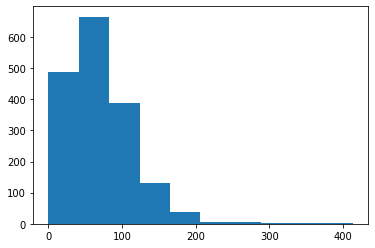

1732
[0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29,

In [11]:
count = count_scene_mentions(data)
plt.hist(count)
plt.show()
print(len(count))
print(sorted(count))

In [13]:
for item in train:
    length = len(item['querySpans'])
    if length > 300:
        print(item['scene_id'])
        for x in item['sentences']:
            print(" ".join(x))
        print("=="*50)

s01e01c02t
Leonard : Okay , well , make yourself at home .
Penny : Okay , thankyou .
Leonard : Thank you . You 're very welcome .
Penny : This looks like some serious stuff . Leonard , did you do this ?
Sheldon : Actually , that 's my work .
Penny : Wow .
Sheldon : Yeah , well , it 's just some quantum mechanics with a little string theory doodling around the edges . That part 's just a joke . It 's a spoof of the Born - Oppenheimer approximation .
Penny : So you 're , like , one of those Beautiful Mind genius guys .
Sheldon : Yeah .
Penny : This is really impressive .
Leonard : I have a board , if you like boards . This is my board .
Penny : Holy smokes .
Sheldon : Holy smokes . If by " holy smokes , " you mean a derivative restatement of the stuff you can find scribbled on the wall of any men 's room at MIT , sure .
Leonard : What ?
Sheldon : Who has n't seen this differential below " here I sit brokenhearted " ?
Leonard : At least I did n't have to invent 26 dimensions just to make 

In [3]:
with open('source_data/dev_test.pkl', 'rb') as f:
    dev_test = pkl.load(f)

with open('source_data/train.pkl', 'rb') as f:
    train = pkl.load(f)

with open('source_data/extended_train.pkl', 'rb') as f:
    extended_train = pkl.load(f)

In [6]:
for item in dev_test:
    print(item['scene_id'])

s01e01c00f
s01e01c01f
s01e01c02f
s01e01c03f
s01e01c04f
s01e01c05f
s01e01c06f
s01e01c07f
s01e01c08f
s01e01c09f
s01e01c10f
s01e01c11f
s01e01c12f
s01e01c13f
s01e04c00f
s01e04c01f
s01e04c02f
s01e04c03f
s01e04c04f
s01e04c05f
s01e04c06f
s01e04c07f
s01e04c08f
s01e04c09f
s01e04c10f
s01e04c11f
s01e04c12f
s01e04c13f
s01e04c14f
s09e01c00t
s09e01c01t
s09e01c02t
s09e01c03t
s09e01c04t
s09e01c05t
s09e01c06t
s09e01c07t
s09e01c08t
s09e01c09t
s09e01c10t
s09e01c11t
s09e01c12t
s09e01c13t
s09e03c00t
s09e03c01t
s09e03c02t
s09e03c03t
s09e03c04t
s09e03c05t
s09e03c06t
s09e03c07t
s09e03c08t
s09e03c09t
s09e03c10t
s09e03c11t
s09e03c12t
s09e03c13t
s09e04c00t
s09e04c01t
s09e04c02t
s09e04c03t
s09e04c04t
s09e04c05t
s09e04c06t
s09e04c07t
s09e04c08t
s09e04c09t
s09e04c10t
s09e04c11t
s09e04c12t
s09e07c00t
s09e07c01t
s09e07c02t
s09e07c03t
s09e07c04t
s09e07c05t
s09e07c06t
s09e07c07t
s09e07c08t
s09e07c09t
s09e07c10t
s09e09c00t
s09e09c01t
s09e09c02t
s09e09c03t
s09e09c04t
s09e09c05t
s09e09c06t
s09e09c07t
s09e09c08t
s09e09c09t

In [21]:
def count_scene_mentions(data):
    temp = []
    for scene in data:
        temp.append(len(scene['querySpans']))
    return temp

[35, 39, 96, 30, 58, 55, 42, 95, 68, 80, 23, 130, 53, 68, 80, 95, 130, 97, 57, 48, 78, 76, 90, 71, 62, 86, 57, 53, 84, 91, 108, 54, 77, 72, 166, 109, 64, 53, 51, 122, 87, 184, 71, 79, 104, 63, 69, 680, 99, 89, 14, 58, 37, 34, 60, 78, 51, 60, 49, 43, 96, 32, 99, 75, 64, 64, 45, 167, 93, 46, 58, 101, 29, 130, 50, 67, 93, 34, 33, 65, 77, 43, 76, 37, 38, 43, 82, 75, 37, 116, 36, 67, 121, 95, 85, 79, 76, 57]


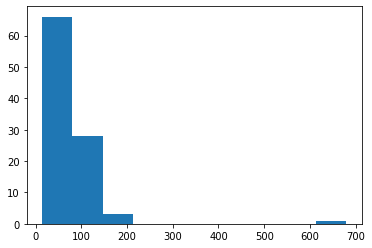

In [8]:
def analyze_scenes(data):
    temp = []
    for scene in data:
        temp.append(len(scene['querySpans']))
    print(temp)

    plt.hist(temp)
    plt.show()

with open('scenes/dev_tbbt.pkl', 'rb') as f:
    input = pkl.load(f)
    analyze_scenes(input)

In [33]:
for i, file_name in enumerate(sorted(os.listdir("scenes/"), reverse=True)):
    print(file_name)

train_tbbt.pkl
train_friends.pkl
train_extended_friends.pkl
test_tbbt.pkl
test_friends.pkl
test_extended_friends.pkl
dev_tbbt.pkl
dev_friends.pkl
dev_extended_friends.pkl
